In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [274]:
demand = pd.read_csv("day (4).csv", parse_dates=['dteday'])

In [275]:
demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [276]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [277]:
demand.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [278]:
### Datacleaning


In [279]:
demand.isnull().sum()/len(demand.index)
# no missing values in the data

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [280]:
demand.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [281]:
'''We have found a few variables that we can drop from further analysis based on our 
initial review of the data and the data dictionary. In particular, since we already have separate columns for "year" and "month," 
we will eliminate the "instant" column, which is essentially an index value, and the "dteday" column. This will enable us to 
concentrate on the variables that are most pertinent to and valuable for our study.'''

demand=demand[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

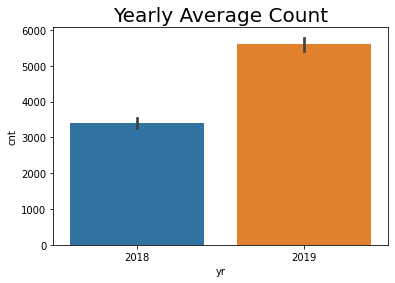

In [282]:
demand['yr'] = demand['yr'].map({0:'2018',1:'2019'})


# Visualising Yearly count of rented bikes

sns.barplot(demand['yr'],demand['cnt'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

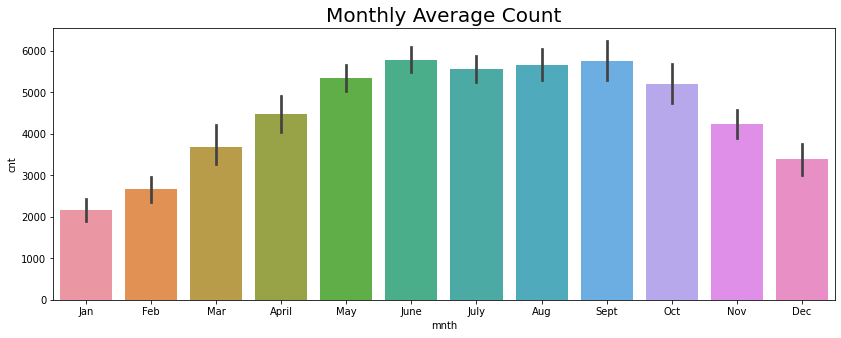

In [283]:
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April',
              5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
              9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Use map function to convert month numbers to month names
demand['mnth'] = demand['mnth'].map(month_dict)

# Visualize monthly count of rented bikes
plt.figure(figsize=[14,5])
sns.barplot(demand['mnth'],demand['cnt'])
plt.title('Monthly Average Count', fontsize=20)
plt.show()

The average count of rented bikes is highest in August, June, September, and July, with almost similar demand. This is followed by May and October. The company should ensure a high availability of bikes during these months. On the other hand, the demand is lowest in December, January, and February, possibly due to the winter season.

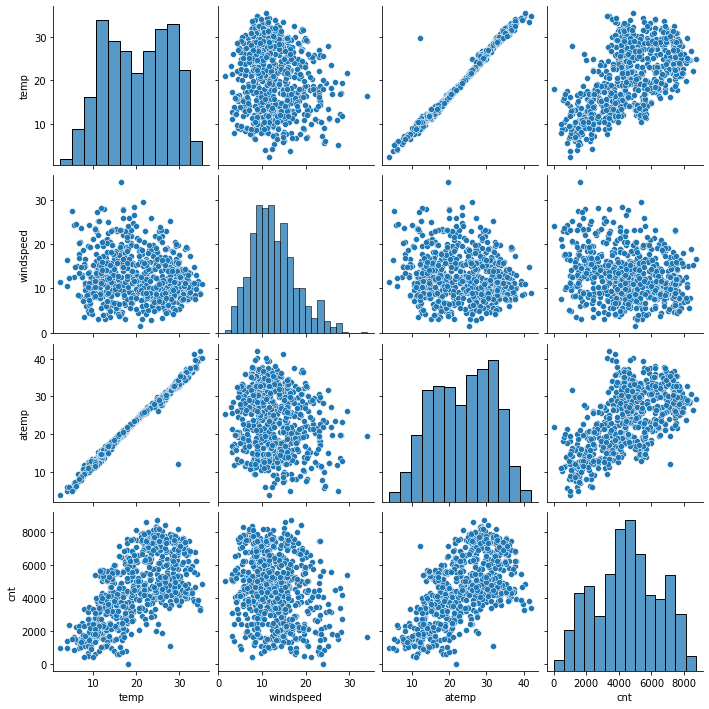

In [284]:
sns.pairplot(demand, vars=["temp",'windspeed','atemp','cnt'])
plt.show()

There appears to be a positive correlation between some of the independent variables and the 'count' variable. In particular, bike rentals seem to be strongly correlated with temperature.

#Create Dummy variables

In [285]:
mapping_list = [{1:'spring', 2:'summer', 3:'fall', 4:'winter'},
                {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},
                {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'},
                {1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}]

# List of categorical columns
cat_cols = ['season', 'mnth', 'weekday', 'weathersit']

# Iterate over each column and apply the mapping
for col, mapping in zip(cat_cols, mapping_list):
  demand[col] = demand[col].map(mapping)

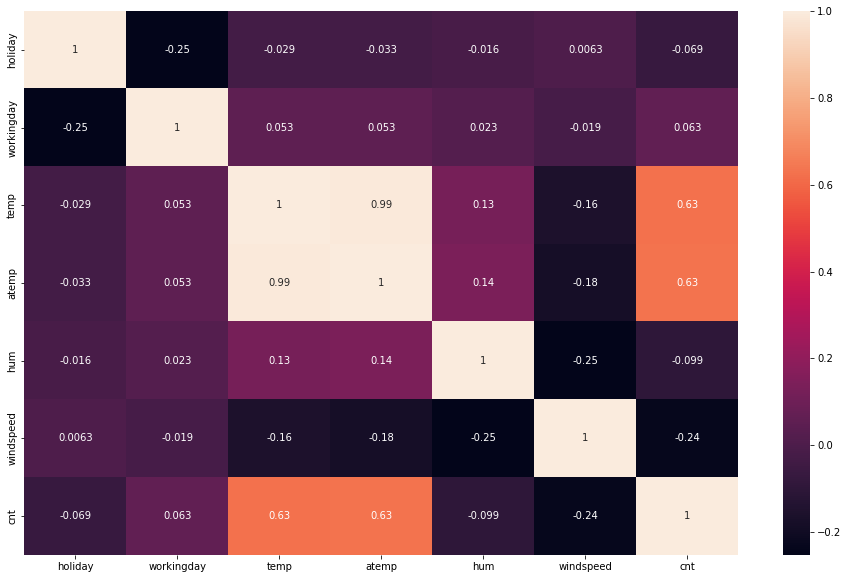

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,NaN,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,2018,NaN,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,2018,NaN,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,NaN,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,NaN,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [286]:
plt.figure(figsize = (16, 10))
sns.heatmap(demand.corr(), annot = True)
plt.show()
demand=demand.drop(['atemp'],axis=1)
demand.head()


In [287]:
category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in category:
    demand[i] = demand[i].astype('category')

In [288]:
demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,NaN,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,2018,NaN,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,2018,NaN,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,NaN,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,NaN,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [289]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        0 non-null      category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.1 KB


In [290]:
dummy = pd.get_dummies(demand[category], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,yr_2019,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light_snowrain,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [291]:
demand = pd.concat([demand,dummy], axis=1)
demand.head()
demand.drop(category, axis=1, inplace = True)

In [292]:
demand.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light_snowrain,weathersit_Misty
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1,1,0,0


 # Splitting the Data 

In [293]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(demand, train_size = 0.7, random_state = 100)

In [294]:
df_train.shape

(510, 18)

In [295]:
scaler = MinMaxScaler()

In [296]:
num_vars = ['temp','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [297]:
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light_snowrain,weathersit_Misty
576,0.815169,70.4167,0.264686,0.827658,0,0,0,1,0,0,0,0,0,1,0,1,0,0
426,0.442393,62.1250,0.255342,0.465255,1,0,0,1,0,0,1,0,0,0,0,0,0,1
728,0.245101,48.3333,0.663106,0.204096,1,0,0,1,0,0,0,1,0,0,0,0,0,0
482,0.395666,48.9583,0.188475,0.482973,0,1,0,1,0,0,1,0,0,0,0,0,0,1
111,0.345824,72.9583,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [298]:
df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,63.123710,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.025490,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.676471,0.029412,0.345098
std,0.225858,14.153170,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,52.270825,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,63.437500,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,73.250025,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,97.041700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [299]:
df_train.dtypes

temp                         float64
hum                          float64
windspeed                    float64
cnt                          float64
season_spring                  uint8
season_summer                  uint8
season_winter                  uint8
yr_2019                        uint8
holiday_1                      uint8
weekday_mon                    uint8
weekday_sat                    uint8
weekday_sun                    uint8
weekday_thu                    uint8
weekday_tue                    uint8
weekday_wed                    uint8
workingday_1                   uint8
weathersit_Light_snowrain      uint8
weathersit_Misty               uint8
dtype: object

In [300]:
y_train = df_train.pop('cnt')
X_train = df_train

Building a linear model


In [301]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [302]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 10),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', False, 2),
 ('yr_2019', True, 1),
 ('holiday_1', False, 3),
 ('weekday_mon', False, 6),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 8),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 9),
 ('workingday_1', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [303]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'windspeed', 'season_spring', 'yr_2019', 'weekday_sat',
       'workingday_1', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [304]:
X_train.columns[~rfe.support_]

Index(['hum', 'season_summer', 'season_winter', 'holiday_1', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [305]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,temp,windspeed,season_spring,yr_2019,weekday_sat,workingday_1,weathersit_Light_snowrain,weathersit_Misty
576,0.815169,0.264686,0,1,0,1,0,0
426,0.442393,0.255342,1,1,1,0,0,1
728,0.245101,0.663106,1,1,0,0,0,0
482,0.395666,0.188475,0,1,1,0,0,1
111,0.345824,0.380981,0,0,0,1,0,1


Model1

In [306]:

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     286.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          1.60e-181
Time:                        16:16:16   Log-Likelihood:                 477.14
No. Observations:                 510   AIC:                            -936.3
Df Residuals:                     501   BIC:                            -898.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2773      0.021     13.391      0.000       0.237       0.318
temp                          0.3596      0.024     14.884      0.000       0.312       0.407
windspeed                    -0.1573      0.026     -6.122      0.000      -0.208      -0.107
season_spring                -0.1540      0.013    -12.253      0.000      -0.179      -0.129
yr_2019                       0.2363      0.009     27.612      0.000       0.220       0.253
weekday_sat                   0.0644      0.015      4.299      0.000       0.035       0.094
workingday_1                  0.0528      0.012      4.547      0.000       0.030       0.076
weathersit_Light_snowrain    -0.2781      0.026    -10.856      0.000      -0.328      -0.228
weathersit_Misty             -0.0772      0.009     -8.495      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       59.762   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.318
Skew:                          -0.621   Prob(JB):                     2.06e-31
Kurtosis:                       5.260   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.13
5,workingday_1,4.25
1,windspeed,3.89
3,yr_2019,2.03
4,weekday_sat,1.73
2,season_spring,1.63
7,weathersit_Misty,1.51
6,weathersit_Light_snowrain,1.07


### Model2

In [308]:
X_train_rfe2 = X_train_rfe.drop(["weekday_sat"], axis = 1)
X_train_lm2 = sm.add_constant(X_train_rfe2)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     314.0
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          7.43e-179
Time:                        16:16:16   Log-Likelihood:                 467.90
No. Observations:                 510   AIC:                            -919.8
Df Residuals:                     502   BIC:                            -885.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [309]:
vif = pd.DataFrame()

vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.38
1,windspeed,3.74
4,workingday_1,2.89
3,yr_2019,2.03
2,season_spring,1.56
6,weathersit_Misty,1.48
5,weathersit_Light_snowrain,1.06


In [310]:
y_train_pred = lr1.predict(X_train_lm1)

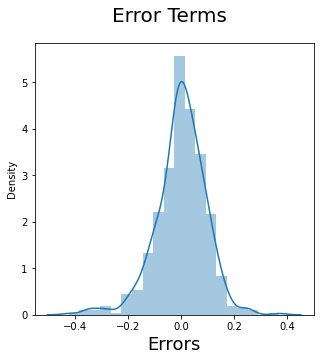

In [311]:
res = y_train - y_train_pred


fig = plt.figure(figsize=[5,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Prediction

In [312]:

demand.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light_snowrain,weathersit_Misty
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [313]:
num_variables=['temp','windspeed','cnt']

#Fit on data
demand[num_variables] = scaler.transform(demand[num_variables])
demand.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light_snowrain,weathersit_Misty
0,0.355170,80.5833,0.253982,0.110792,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.379232,69.6087,0.443364,0.089623,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.171000,43.7273,0.442870,0.152669,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.175530,59.0435,0.253659,0.177174,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0.209120,43.6957,0.310853,0.181546,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [314]:
y_test =demand.pop('cnt')
X_test = demand
X_test.describe()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light_snowrain,weathersit_Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.543852,62.765175,0.318596,0.246575,0.252055,0.243836,0.500000,0.028767,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.683562,0.028767,0.336986
std,0.228140,14.237589,0.166717,0.431313,0.434490,0.429689,0.500343,0.167266,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.465405,0.167266,0.473004
min,0.000000,0.000000,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346084,52.000000,0.199170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.548307,62.625000,0.298115,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.743261,72.989575,0.410427,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,97.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [315]:
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,temp,windspeed,season_spring,yr_2019,weekday_sat,workingday_1,weathersit_Light_snowrain,weathersit_Misty
0,1.0,0.355170,0.253982,1,0,1,0,0,1
1,1.0,0.379232,0.443364,1,0,0,0,0,1
2,1.0,0.171000,0.442870,1,0,0,1,0,0
3,1.0,0.175530,0.253659,1,0,0,1,0,0
4,1.0,0.209120,0.310853,1,0,0,1,0,0


In [316]:
y_pred = lr1.predict(X_test_new1)

In [317]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8140519196636458

In [318]:
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

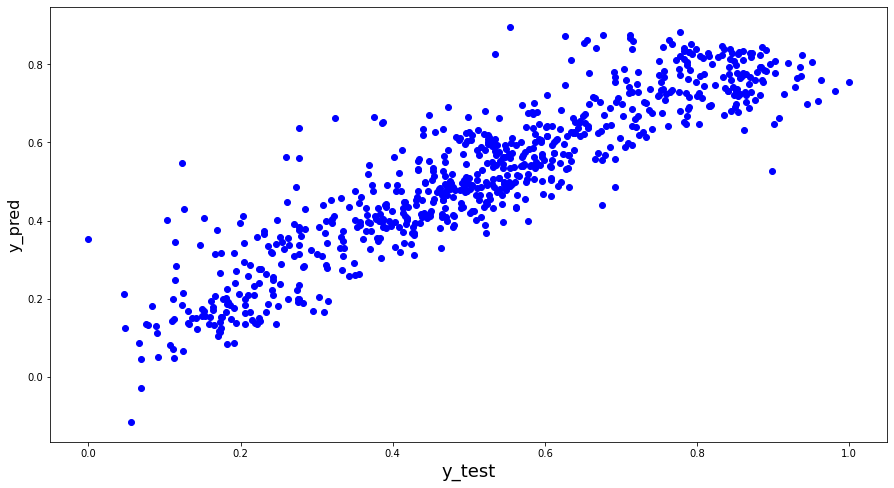

In [319]:
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [320]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 81.41
Train data r^2 : 82.07


In [321]:
n = X_test.shape[0]
n1 = X_train_rfe.shape[0]


p = X_test.shape[1]
p1 = X_train_rfe.shape[1]



adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 80.96
Train data adjusted r^2 : 81.78


###**Below predictor variables influences bike booking :**

There are a few variables that have negative coefficients in this model. This means that as these variables increase, the dependent variable tends to decrease. These variables include spring, misty, cloudy, and light snow.

1) High  demand in 2019
2) demand is more durig spring and winter
3) month: jan,july,sep,nov, dec
4)If its a holiday
5)  windspeed
6)temp
7)snowrain
8)misty



Test data r^2 : 83.23

Train data r^2 : 83.86

Test data adjusted r^2 : 82.56

Train data adjusted r^2 : 83.4

###count= 0.2871* const + 0.4026*temp - 0.1560 * windspeed-0.1046 x season_spring + season_winter x 0.0616 +year x 0.2355-dec x 0.0506-0.0653 * july-0.0464 x nov - 0.0531 * sep-0.0878 x not_holiday + 0.0203 x weeday_saturday-0.2944 x weathersit_Light_snowrain-0.0798 x misty
